In [1]:
import pandas as pd
from pathlib import Path

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from  datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime as datetime
from sklearn.metrics import accuracy_score
from category_encoders.target_encoder import TargetEncoder
warnings.filterwarnings('ignore')


In [3]:
train = pd.read_csv("../input/tabular-playground-series-dec-2021/train.csv")
test = pd.read_csv("../input/tabular-playground-series-dec-2021/test.csv")


In [4]:
train.head(100)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3440475,2634,132,3,166,38,1247,251,210,119,...,0,0,0,0,0,0,0,0,0,2
1,2470812,2769,89,5,633,10,626,177,209,178,...,0,0,0,0,0,0,0,0,0,2
2,536780,2749,46,30,127,239,2569,206,216,144,...,0,0,0,0,0,0,0,0,0,2
3,3115135,2574,155,20,279,1,1932,205,189,199,...,0,0,0,0,0,0,0,0,0,2
4,81861,2779,91,19,523,-2,2976,240,246,105,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,884544,3023,202,10,357,248,201,241,239,170,...,0,0,0,0,0,0,0,0,0,2
96,1237033,2838,51,17,472,18,511,202,206,81,...,0,0,0,0,0,0,0,0,0,2
97,3140700,2707,102,15,347,138,1072,222,235,116,...,0,0,0,0,0,0,0,0,0,2
98,3129090,2609,169,36,190,0,3484,191,224,131,...,0,0,0,0,0,0,0,0,0,2


In [5]:
train.tail()


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
3599995,2249467,3059,363,16,98,5,598,211,243,140,...,0,0,0,0,0,0,0,0,0,1
3599996,963395,3147,86,16,216,26,862,228,220,87,...,0,0,0,0,0,0,0,0,0,1
3599997,2215104,2593,112,37,348,87,2211,230,237,145,...,0,0,0,0,0,0,0,0,0,3
3599998,1484405,3091,118,2,137,-4,810,223,222,171,...,0,0,0,0,0,0,0,0,0,1
3599999,305711,3150,382,9,228,66,3229,234,222,151,...,0,0,0,0,0,0,0,0,0,1


In [6]:
train.columns


Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [7]:
train.describe()


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,...,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06,3.600000e+06
mean,2.000069e+06,2.980147e+03,1.515727e+02,1.510050e+01,2.712761e+02,5.166790e+01,1.766483e+03,2.118390e+02,2.210576e+02,1.408136e+02,...,3.746250e-02,3.785972e-02,1.201639e-02,1.604194e-02,1.068556e-02,1.219861e-02,4.074917e-02,3.924222e-02,3.158944e-02,1.771544e+00
std,1.154820e+06,2.890440e+02,1.099497e+02,8.546351e+00,2.265100e+02,6.822503e+01,1.315661e+03,3.075498e+01,2.223373e+01,4.367894e+01,...,1.898923e-01,1.908569e-01,1.089587e-01,1.256368e-01,1.028172e-01,1.097716e-01,1.977086e-01,1.941708e-01,1.749044e-01,8.940261e-01
min,0.000000e+00,1.773000e+03,-3.300000e+01,-3.000000e+00,-8.200000e+01,-3.170000e+02,-2.870000e+02,-4.000000e+00,4.900000e+01,-5.300000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,9.997378e+05,2.760000e+03,6.000000e+01,9.000000e+00,1.100000e+02,4.000000e+00,8.220000e+02,1.980000e+02,2.100000e+02,1.150000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.000172e+06,2.966000e+03,1.230000e+02,1.400000e+01,2.130000e+02,3.100000e+01,1.436000e+03,2.180000e+02,2.240000e+02,1.420000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
75%,3.000448e+06,3.217000e+03,2.470000e+02,2.000000e+01,3.610000e+02,7.800000e+01,2.365000e+03,2.330000e+02,2.370000e+02,1.690000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
max,3.999999e+06,4.383000e+03,4.050000e+02,6.400000e+01,1.602000e+03,6.320000e+02,7.666000e+03,2.970000e+02,2.790000e+02,2.720000e+02,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00


In [8]:
# print("Mean",np.mean(train))
# print("Standard Deviation", np.std(train))
# print("Min", np.min(train))
# print("Max", np.max(train))


In [9]:
train['Cover_Type'].describe()


count    3.600000e+06
mean     1.771544e+00
std      8.940261e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      7.000000e+00
Name: Cover_Type, dtype: float64

In [10]:
train.groupby('Cover_Type').size()


Cover_Type
1    1320866
2    2036254
3     176184
4        333
5          1
6      10237
7      56125
dtype: int64

(array([1.320866e+06, 2.036254e+06, 0.000000e+00, 1.761840e+05,
        0.000000e+00, 3.330000e+02, 1.000000e+00, 0.000000e+00,
        1.023700e+04, 5.612500e+04]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

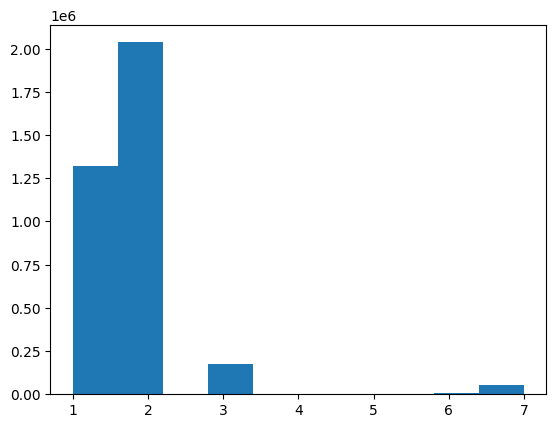

In [11]:
plt.hist(train['Cover_Type'])


In [12]:
#skewness and kurtosis
print("Skewness: %f" % train['Cover_Type'].skew())
print("Kurtosis: %f" % train['Cover_Type'].kurt())


Skewness: 3.321230
Kurtosis: 17.043735


<Axes: xlabel='Hillshade_Noon', ylabel='Cover_Type'>

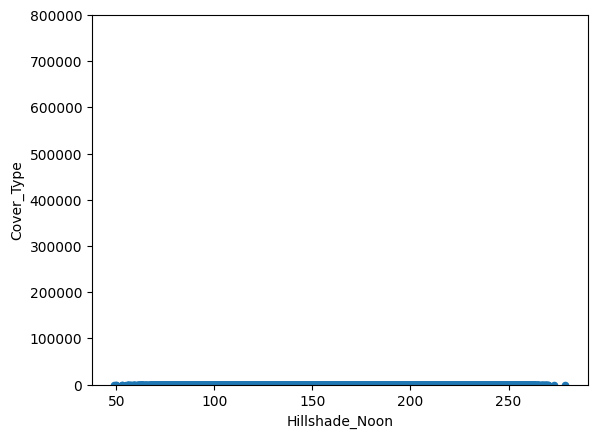

In [13]:
var = 'Hillshade_Noon'
data = pd.concat([train['Cover_Type'], train[var]], axis=1)
data.plot.scatter(x=var, y='Cover_Type', ylim=(0,800000))


In [14]:
#most correlated 10 columns
corr=train.corr()
v=10
colmn = corr.nlargest(v, 'Cover_Type')
colmn


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Cover_Type,0.059514,-0.395488,-0.002674,0.023242,0.012735,0.033106,-0.093830,-0.002239,-0.006396,-0.004544,...,-0.004844,0.006814,0.006632,0.027776,0.017748,0.024768,0.050721,0.099145,0.053706,1.000000
Wilderness_Area4,0.107340,-0.362080,-0.007003,0.053799,-0.024609,0.028717,-0.114423,-0.008554,-0.014341,-0.016841,...,-0.024575,-0.020147,0.002424,-0.000653,-0.000290,-0.000233,-0.023564,-0.018603,-0.012521,0.250145
Soil_Type39,0.008537,0.020972,0.000961,-0.001008,0.003706,0.000718,0.012574,-0.001339,-0.005119,0.001789,...,-0.004486,-0.007290,0.004338,-0.003510,0.000771,-0.002767,0.003830,1.000000,0.000305,0.099145
Wilderness_Area3,-0.071145,-0.001985,0.003216,0.033025,0.011414,0.001698,-0.013280,-0.011699,-0.016152,0.011265,...,0.018085,0.025642,0.000626,0.001208,-0.002237,0.004526,0.002857,0.006420,-0.007068,0.093858
Soil_Type10,0.115754,-0.106934,-0.003695,0.021766,-0.000857,0.008559,-0.027565,-0.013579,-0.012379,0.007167,...,-0.019671,-0.011289,0.003643,-0.002792,0.003625,0.006929,-0.008590,-0.001603,-0.003612,0.073520
Id,1.000000,-0.062111,-0.000700,0.038772,-0.024185,-0.017731,-0.116686,0.007415,-0.035484,-0.071410,...,-0.014112,-0.033235,0.000356,0.002164,0.001643,0.006289,0.021946,0.008537,0.016325,0.059514
Soil_Type40,0.016325,0.021036,0.002054,0.001317,0.002965,0.006491,0.010850,0.000867,0.003613,0.001861,...,-0.004260,-0.002351,0.000080,-0.005655,-0.001455,-0.004026,-0.004033,0.000305,1.000000,0.053706
Soil_Type38,0.021946,0.026237,-0.000034,-0.002385,0.004853,0.000385,0.016655,-0.003224,0.000492,0.004128,...,-0.007626,-0.007655,0.001937,0.001506,0.003942,-0.001990,1.000000,0.003830,-0.004033,0.050721
Soil_Type3,0.072550,-0.084710,0.004762,0.017929,-0.007610,0.003257,-0.038113,0.002800,0.010100,0.003146,...,0.005748,0.005939,0.000322,-0.001148,-0.000090,-0.000099,-0.011407,-0.007845,-0.007537,0.048799
Soil_Type6,0.067569,-0.074947,-0.001484,-0.008356,0.000051,0.003782,-0.014957,0.002144,0.004933,0.004312,...,0.009443,0.010617,0.001963,-0.000845,-0.000529,-0.001816,-0.006898,-0.003995,-0.003820,0.048252


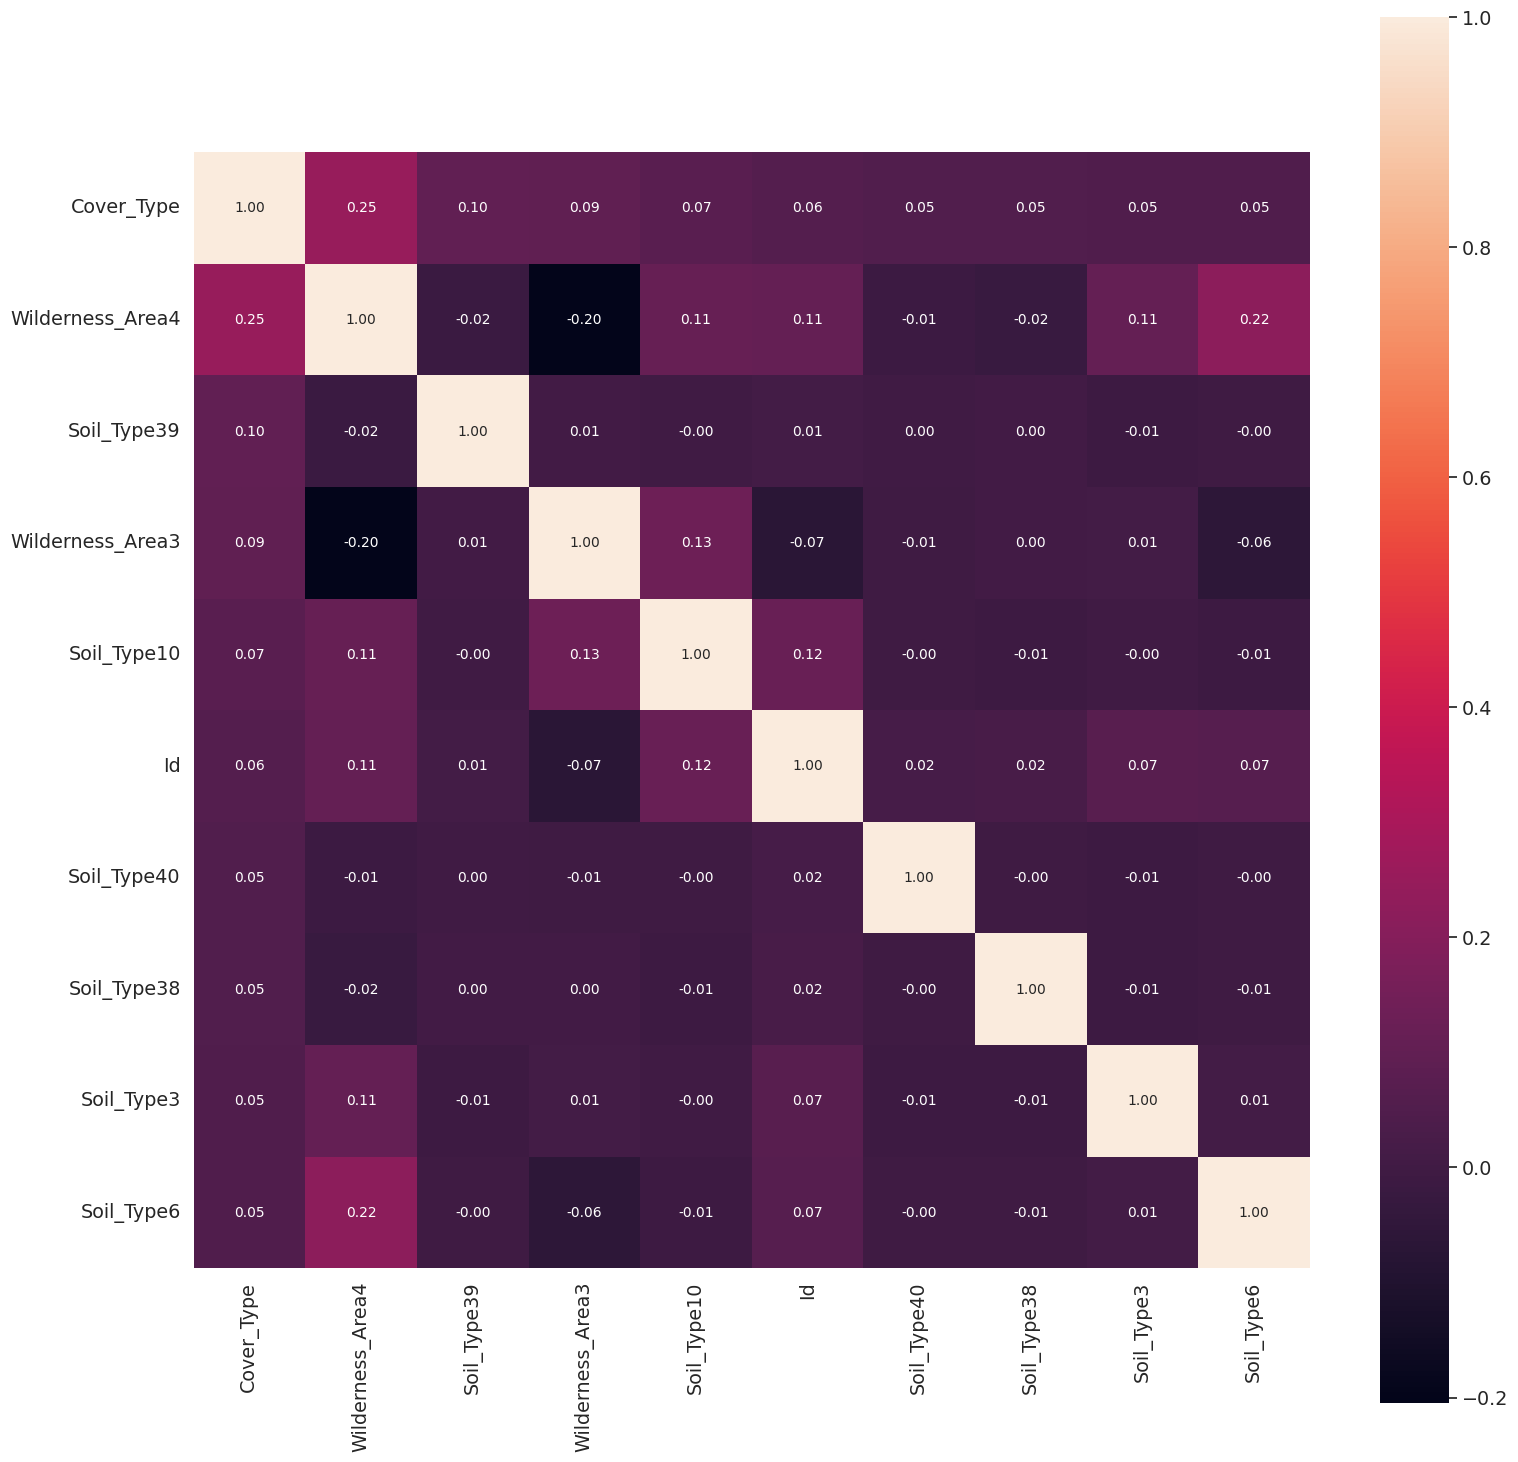

In [15]:
colmn = corr.nlargest(v, 'Cover_Type')['Cover_Type'].index 
xm = np.corrcoef(train[colmn].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(18, 18))
hm = sns.heatmap(xm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=colmn.values, xticklabels=colmn.values)
plt.show()


In [16]:
total= train.isnull().sum().sort_values(ascending=False)
total


Id                                    0
Elevation                             0
Soil_Type16                           0
Soil_Type17                           0
Soil_Type18                           0
Soil_Type19                           0
Soil_Type20                           0
Soil_Type21                           0
Soil_Type22                           0
Soil_Type23                           0
Soil_Type24                           0
Soil_Type25                           0
Soil_Type26                           0
Soil_Type27                           0
Soil_Type28                           0
Soil_Type29                           0
Soil_Type30                           0
Soil_Type31                           0
Soil_Type32                           0
Soil_Type33                           0
Soil_Type34                           0
Soil_Type35                           0
Soil_Type36                           0
Soil_Type37                           0
Soil_Type38                           0


In [17]:
# drop ID
train_X = train.drop('Id', axis=1)
#drop output
train_X = train_X.drop('Cover_Type', axis=1)
#contain output on y container
train_y = train['Cover_Type']


In [18]:
train_y.head()


0    2
1    2
2    2
3    2
4    2
Name: Cover_Type, dtype: int64

In [19]:
#trin_test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.22, random_state=2021 )


In [20]:
del train, train_X, train_y


In [21]:
y_test


2019379    1
2562489    2
2923541    1
2972855    2
228557     1
          ..
245205     2
3507543    1
3018336    3
1581970    2
828229     2
Name: Cover_Type, Length: 792000, dtype: int64

In [22]:
#Encoding those data
nums_cols = [col for col in X_train.columns if X_train[col].dtype in ["float16","float32","float64"]]
catgo_cols = [col for col in X_train.columns if X_train[col].dtype not in ["float16","float32","float64"]]


In [23]:
test=test.drop('Id', axis=1)


In [24]:
d_test = test

for cols in catgo_cols:
    enc = TargetEncoder(cols=[cols])
    x = enc.fit_transform(X_train, y_train)
    y= enc.transform(X_test)
    z = enc.transform(d_test)


In [25]:
del test


In [26]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
train_X = pd.DataFrame(scaler.transform(x))
test_X = pd.DataFrame(scaler.transform(y))
test = pd.DataFrame(scaler.transform(z))


In [27]:
del x,y,z


In [28]:
train_X


,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1.514713,-0.732572,-0.011523,0.864454,-0.698941,0.677302,0.850775,1.076215,-0.248290,-0.438552,...,-0.168249,-0.197085,-0.19822,-0.110297,-0.127907,-0.104181,-0.110741,-0.206151,-0.202126,9.904286
1,1.843335,-0.996337,-0.596753,-0.137947,-0.977516,1.443239,-0.970647,0.401664,-0.889456,-0.776398,...,-0.168249,-0.197085,-0.19822,-0.110297,-0.127907,-0.104181,-0.110741,-0.206151,-0.202126,9.904286
2,-1.487859,-1.196434,2.446442,-1.056447,-0.669617,-0.315832,1.501282,0.491604,-0.248290,-1.284496,...,-0.168249,-0.197085,-0.19822,-0.110297,-0.127907,-0.104181,-0.110741,-0.206151,-0.202126,9.904286
3,1.459366,-0.641619,0.456661,-0.146779,0.547319,0.212269,-1.068223,-0.947438,-0.866557,0.467689,...,-0.168249,-0.197085,-0.19822,-0.110297,-0.127907,-0.104181,-0.110741,-0.206151,-0.202126,9.904286
4,1.068478,1.604928,-0.011523,-0.809158,-0.127127,-0.972349,0.070165,-1.936780,-0.065099,0.091714,...,-0.168249,-0.197085,-0.19822,-0.110297,-0.127907,-0.104181,-0.110741,-0.206151,-0.202126,9.904286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807995,1.276029,-0.687095,-0.245615,-0.826822,-0.640293,0.209230,-2.011459,-0.542708,-0.797860,-0.693045,...,-0.168249,-0.197085,-0.19822,-0.110297,-0.127907,-0.104181,-0.110741,-0.206151,-0.202126,9.904286
2807996,-1.096971,-0.678000,-0.362661,-0.442642,0.195434,-0.982227,0.395419,0.311723,0.369977,1.506941,...,-0.168249,-0.197085,-0.19822,-0.110297,-0.127907,-0.104181,-0.110741,-0.206151,-0.202126,9.904286
2807997,1.227600,0.104199,0.339615,0.524432,-0.845559,0.571682,0.655622,1.301065,0.118091,0.636169,...,-0.168249,-0.197085,-0.19822,-0.110297,-0.127907,-0.104181,-0.110741,-0.206151,-0.202126,9.904286
2807998,-0.325573,0.340677,1.861212,-0.433810,-0.962854,-1.141798,-2.727017,1.166155,1.102738,-0.591071,...,-0.168249,-0.197085,-0.19822,-0.110297,-0.127907,-0.104181,-0.110741,-0.206151,-0.202126,9.904286


In [29]:
train_X = train_X.to_numpy().astype(np.float32)
y_train =y_train.to_numpy().astype(np.float32)
y_test =y_test.to_numpy().astype(np.float32)
test_X =test_X.to_numpy().astype(np.float32)
test =test.to_numpy().astype(np.float32)


In [30]:
# XGBClassifier = xgb.XGBClassifier(max_depth = 9,
#                                  learning_rate = 0.008,
#                                  n_estimators = 20000,
# #                                  objective = 'binary:logistic',
#                                  objective = 'multi:softmax',
#                                  tree_method = 'gpu_hist',
#                                  booster = 'gbtree',
#                                  gamma = 0.75,
#                                  max_delta_step = 6,
#                                  min_child_weight = 9,
#                                  subsample = 0.8326,
#                                  colsample_bytree = 0.7,
#                                  colsample_bynode= 0.7523,
#                                  colsample_bylevel=0.8231,
#                                  predictor= 'gpu_predictor'
# #                                  n_jobs = -1
#                                  )


In [31]:
from xgboost import XGBClassifier


# declare parameters
params = {
#             'objective':'binary:logistic',/
            'objective' : 'multi:softmax',
            'tree_method': 'gpu_hist',
            'eval_metric': 'mlogloss',
            'booster' : 'gbtree',
            'gamma' : 0.75,
            'max_depth': 7,
            'alpha': 10,
            'learning_rate': .007,
            'n_estimators':2000,
            'predictor': 'gpu_predictor'
        }         
           
          
# instantiate the classifier 
xgb = XGBClassifier(**params)
xgb.fit(train_X, y_train,
          early_stopping_rounds=200,
          eval_set=[(test_X,y_test)],
          verbose=True)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6], got [1. 2. 3. 4. 5. 6. 7.]

In [32]:
preds_valid = xgb.predict(test_X).astype('int')
acc = accuracy_score(y_test,  preds_valid)
print("accuracy score:", acc)


NotFittedError: need to call fit or load_model beforehand

In [33]:
sub = pd.read_csv('../input/tabular-playground-series-dec-2021/sample_submission.csv')
sub['Cover_Type'] =xgb.predict(test).astype('int')
sub.to_csv("submission.csv",index=False)
sub.head()


NotFittedError: need to call fit or load_model beforehand